#Detecção de objetos com YOLOv4 Com OpenCV

Hyago Vieira


In [ ]:
import cv2
print(cv2.__version__)

4.8.0


# Etapa 1 - Importação das bibliotecas

In [1]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile

# Etapa 2 - Conecte ao google drive

Em seguida - Carregue os arquivos do modelo treinado

# Etapa 3 - Carregando os arquivos do modelo treinado

In [2]:
path = '/content/drive/MyDrive/modelo_YOLOv4.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [3]:
labels_path = os.path.sep.join(['/content/cfg', 'coco.names'])

In [4]:
labels_path

'/content/cfg/coco.names'

### Colocando os labels em array organizados de acordo com o coco names

In [5]:
LABELS = open(labels_path).read().strip().split('\n')
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
len(LABELS)

80

In [6]:
weight_path = os.path.sep.join(['/content', 'yolov4.weights'])
config_path = os.path.sep.join(['/content/cfg', 'yolov4.cfg'])
weight_path, config_path

('/content/yolov4.weights', '/content/cfg/yolov4.cfg')

In [7]:
net = cv2.dnn.readNet(config_path, weight_path)

In [ ]:
net

< cv2.dnn.Net 0x7d58b7f19910>

# Etapa 4 - definindo mais configurações para detecção

In [53]:
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype='uint8')
print(COLORS)

[[102  83 155]
 [ 22  72 119]
 [249  90  54]
 [219 230 183]
 [ 36 196 232]
 [219 254 201]
 [185 247  29]
 [ 63 104 207]
 [ 80 227  45]
 [ 10   4  72]
 [248 114 195]
 [229 249  59]
 [102 161 223]
 [  4 108 105]
 [ 44 141 188]
 [ 76 106  66]
 [111 159 224]
 [ 76 250 105]
 [ 47 244  12]
 [196  15  93]
 [ 35  82  86]
 [236 250 160]
 [133  44 210]
 [ 57 127 179]
 [208  29  99]
 [190 189 161]
 [236  51 142]
 [148 123 136]
 [  1  46  60]
 [131  64 138]
 [100 251 215]
 [146 109  42]
 [ 13 101  29]
 [ 46 233  90]
 [ 17 150 188]
 [ 95 139 101]
 [186 148 237]
 [225  95  74]
 [237  76 242]
 [ 73 208 198]
 [229 143   5]
 [149 243 162]
 [110 171 243]
 [ 17 119 101]
 [100 149 195]
 [246 137 196]
 [254  47 190]
 [221 121 138]
 [221  97  46]
 [149 192 218]
 [162 201 152]
 [ 57 232 102]
 [170 217 249]
 [153  45  92]
 [102 173 104]
 [143 237  46]
 [ 20  62  84]
 [158  86  81]
 [118  49  58]
 [  8 156  49]
 [ 34  41 129]
 [122 226 151]
 [ 52  89 194]
 [ 67  23  70]
 [117 125 230]
 [119 182 183]
 [235 182 

Toda vez que encontrar certo objeto vai definir um tipo de cor de LABEL

      251  93 177 - RGB/BGR - person
      35  86  14 - RGB/BGR - bicycle
      ...


In [54]:
ln = net.getLayerNames()
print('Todas as camadas\n', ln, '\nTotal de camadas', str(len(ln)))


Todas as camadas
 ('conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'conv_3

In [55]:
print('Camadas de saída')
print(net.getUnconnectedOutLayers())

Camadas de saída
[327 353 379]


detections layers

In [56]:
ln = [ln[i-1] for i in net.getUnconnectedOutLayers()]
ln

['yolo_139', 'yolo_150', 'yolo_161']

# Etapa 5 - Carregamento da imagem onde será feita a detecção

In [57]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

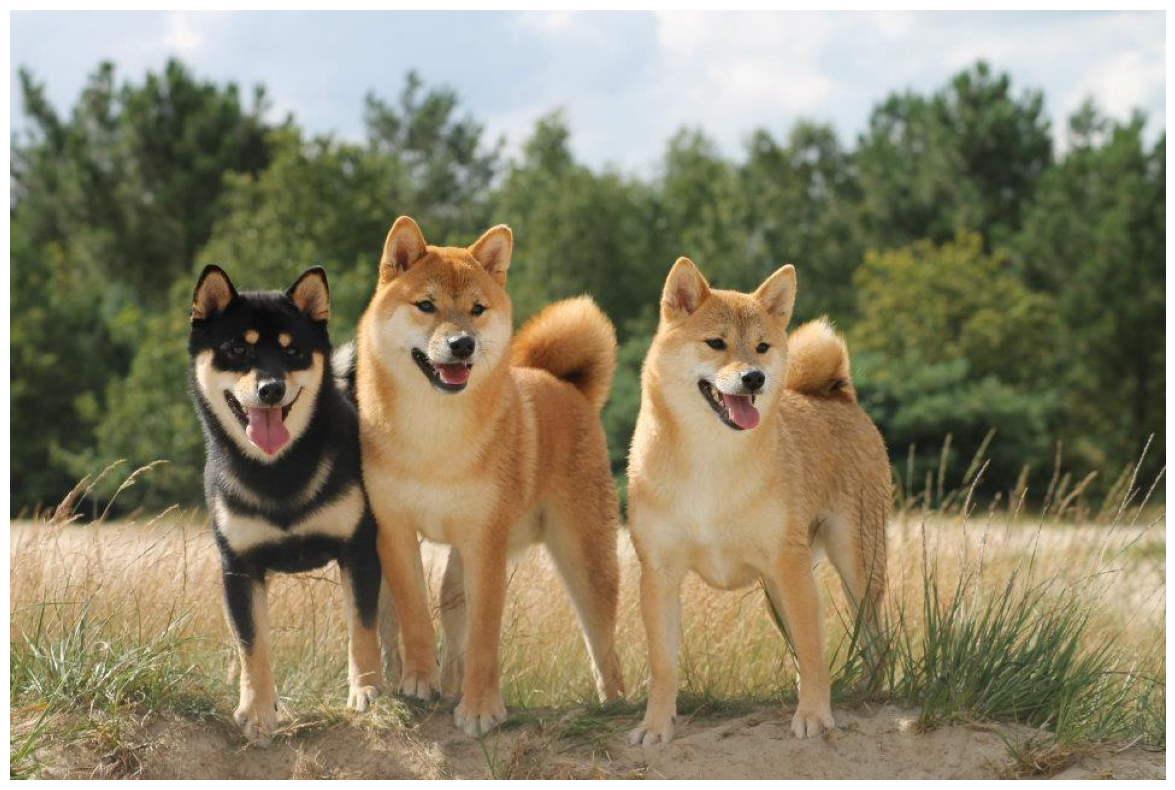

In [13]:
imagem = cv2.imread('/content/drive/MyDrive/imagens/cachorros.jpg')
mostrar(imagem)

In [14]:
type(imagem)

numpy.ndarray

In [15]:
print(imagem)

[[[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [230 227 222]
  [230 227 222]
  [230 227 222]]

 [[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [231 228 223]
  [231 228 223]
  [231 228 223]]

 [[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [232 229 224]
  [232 229 224]
  [232 229 224]]

 ...

 [[104 138 131]
  [ 80 114 107]
  [ 69 106  98]
  ...
  [111 132 147]
  [105 126 141]
  [ 89 110 125]]

 [[114 148 141]
  [117 151 144]
  [108 145 135]
  ...
  [124 147 163]
  [125 148 164]
  [123 146 162]]

 [[ 49  83  76]
  [ 67 102  92]
  [ 67 104  94]
  ...
  [ 73  96 112]
  [ 68  91 107]
  [ 73  96 112]]]


In [16]:
imagem_cp = imagem.copy()

In [18]:
imagem.shape

(640, 960, 3)

In [21]:
(H, W) = imagem.shape[:2]
print('Altura:', H, '\nLargura:', W)

Altura: 640 
Largura: 960


#Etapa 6 - Processamento da imagem de entrada

pre-processamento da imagem com blob. subtração média 1/255 para deixar normalizado e redimensionamento 416 HW.

In [22]:
inicio = time.time()

blob = cv2.dnn.blobFromImage(imagem, 1/255.0, (416,416), swapRB = True, crop = False)
net.setInput(blob)
layer_outputs = net.forward(ln)

termino = time.time()
print('Yolo levou {:.2f} segundos'.format(termino - inicio))

Yolo levou 3.16 segundos


#Etapa 7 - Definindo as variáveis

especificações da detecção

In [23]:
#nível de confianca
threshold = 0.5
#NMS maioria das celulas pc removendo celulas com baixa probabilidade e removendo caixas ao redor
#30%, não vai ficar enxendo a tela com bound box, no mesmo obj detectado ou detectar algo com
#baixa p%
threshold_NMS = 0.3
caixas = []
confiancas = []
IDclasses = []

In [24]:
len(layer_outputs)

3

#Etapa 8 - Realizando a predição

Primeira escala de previsão

In [25]:
layer_outputs[0], len(layer_outputs[0])

(array([[0.01100558, 0.01021743, 0.02264772, ..., 0.        , 0.        ,
         0.        ],
        [0.01492394, 0.01543288, 0.03303435, ..., 0.        , 0.        ,
         0.        ],
        [0.01701084, 0.01489796, 0.05110351, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9912933 , 0.99049157, 0.02108764, ..., 0.        , 0.        ,
         0.        ],
        [0.98667467, 0.9842644 , 0.03099856, ..., 0.        , 0.        ,
         0.        ],
        [0.9830682 , 0.9859079 , 0.0597507 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 8112)

Indicam a segunda escala de previsão, conforme a figura mostrada abaixo

In [26]:
layer_outputs[1]

array([[0.03031929, 0.0320848 , 0.10433294, ..., 0.        , 0.        ,
        0.        ],
       [0.0329858 , 0.03253518, 0.13059318, ..., 0.        , 0.        ,
        0.        ],
       [0.0312387 , 0.03151371, 0.15157267, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96770096, 0.96682906, 0.06866277, ..., 0.        , 0.        ,
        0.        ],
       [0.96435654, 0.96775067, 0.09513659, ..., 0.        , 0.        ,
        0.        ],
       [0.9661032 , 0.9677124 , 0.10772248, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

terceira escala de previsao

In [27]:
layer_outputs[2]

array([[0.06402372, 0.06951444, 0.15857781, ..., 0.        , 0.        ,
        0.        ],
       [0.0616472 , 0.05672149, 0.31426504, ..., 0.        , 0.        ,
        0.        ],
       [0.03240769, 0.0500917 , 0.7458859 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.93245447, 0.9313108 , 0.2066342 , ..., 0.        , 0.        ,
        0.        ],
       [0.9336966 , 0.93029344, 0.29772216, ..., 0.        , 0.        ,
        0.        ],
       [0.9512335 , 0.95295554, 0.5208086 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

O modelo coco possui 80 classes, esses outros valores que são 5 posições,

    pc bx, by, bh, bw

informações sobre o bound box, e depois a previsão qual objeto está dentro da caixa

ou seja usamos estes valores para fazer o bound box

In [28]:
layer_outputs[2][0]

array([6.4023718e-02, 6.9514439e-02, 1.5857781e-01, 3.4840187e-01,
       4.2169395e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [29]:
len(layer_outputs[2][0])

85

In [36]:
#percorre cada uma das camadas de saida da rede neural
for output in layer_outputs:
  #percorre cada uma das detecções
  for detection in output:
    #acessando depois das 5 bound box (p%)
    scores = detection[5:]
    #maior valor é de fato a classe prevista
    classeID = np.argmax(scores)
    #valor visto irá entrar em análise da confianca
    confianca = scores[classeID]
    #verificando o nível de confianca
    if confianca > threshold:
      print('scores:', scores)
      print('classe mais provável:', classeID)
      print('confianca:', confianca)

      # apagando os bound box a mais
      # bound box dos valores 0 a 4 (5 valores)
      caixa = detection[0:4] * np.array([W,H,W,H])
      (centerX, centerY, width, height) = caixa.astype('int')

      x = int(centerX - (width/2))
      y = int(centerY - (height/2))

      caixas.append([x,y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeID)

scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.6059549 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.       ]
classe mais provável: 16
confianca: 0.6059549
scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.9570457 0.        0.        0.        0.
 0.       

16 objetos detectados sem aplicação do NON MAX SUPRESSION

In [41]:
print(caixas), len(caixas)

[[145, 200, 186, 380], [275, 165, 235, 438], [141, 205, 189, 397], [274, 195, 235, 405], [495, 207, 237, 402], [497, 216, 235, 411], [279, 174, 230, 417], [280, 173, 228, 420], [134, 204, 169, 401], [137, 204, 164, 401], [142, 210, 179, 389], [142, 208, 178, 391], [277, 196, 234, 402], [277, 193, 234, 408], [502, 208, 231, 404], [504, 207, 230, 406]]


(None, 16)

In [42]:
print(confiancas), len(confiancas)

[0.6059548854827881, 0.9570456743240356, 0.889125406742096, 0.9090498685836792, 0.9525650143623352, 0.7894679307937622, 0.9860403537750244, 0.9869317412376404, 0.6623756885528564, 0.6959598064422607, 0.9729039072990417, 0.9767161011695862, 0.8875229358673096, 0.8976888060569763, 0.9810120463371277, 0.9824249744415283]


(None, 16)

In [43]:
print(IDclasses), len(IDclasses)

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


(None, 16)

#Etapa 9 - Aplicando a Non-Maxima Suppression

In [44]:
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)

In [45]:
objs

array([ 7, 15, 11], dtype=int32)

In [47]:
print(objs.flatten())

[ 7 15 11]


confianca da detecção de três objetos

In [48]:
confiancas[7], confiancas[15], confiancas[11]

(0.9869317412376404, 0.9824249744415283, 0.9767161011695862)

In [49]:
confiancas[0]

0.6059548854827881

#Etapa 10 - Mostrando o resultado da detecção da imagem

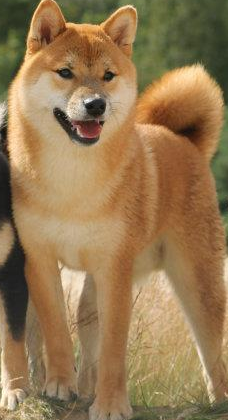

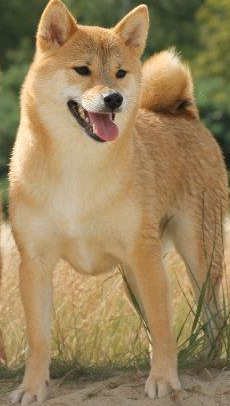

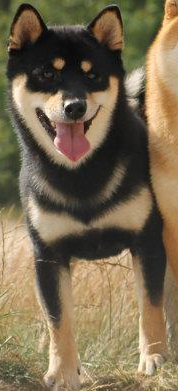

In [58]:
#detectou algo ?
if len(objs) > 0:
  # achata a matriz em vetor, cada índice e extrair de caixas as cordenadas
  #------------------------------------------------------------------------
  #                              LEMBRANDO QUE
  #                               x, y, w, h
  #         x y --> coordenadas              w, h --> dimensão da caixa
  for i in objs.flatten():
    (x, y) = (caixas[i][0], caixas[i][1])
    (w, h) = (caixas[i][2], caixas[i][3])
    #copia da imagem, mostrando cada uma delas cortadas praticamente
    # acima podemos recortar e mandar po e-mail ou algo assim para detecção que foi feita
    objeto = imagem_cp[y:y + h, x:x + w]
    cv2_imshow(objeto)
    #cor configurada acima com as COLORS que pegamos de acordo com id da classe
    cor = [int(c) for c in COLORS[IDclasses[i]]]
    #retangulo desenhado
    #imagem, comeco do bound box(coordenada), coordenada + dimensao, cor, tamanho da letra
    cv2.rectangle(imagem, (x,y), (x+w, y+h), cor, 2)
    texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i])
    # texto colocado na imagem, formatado acima de forma a mostrar a confianca e a classe
    # abaixo aqui colocamos onde irá aparecer na imagem e a font de escrita o tamanho
    cv2.putText(imagem, texto, (x,y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)

#Aqui colocamos a imagem detectada

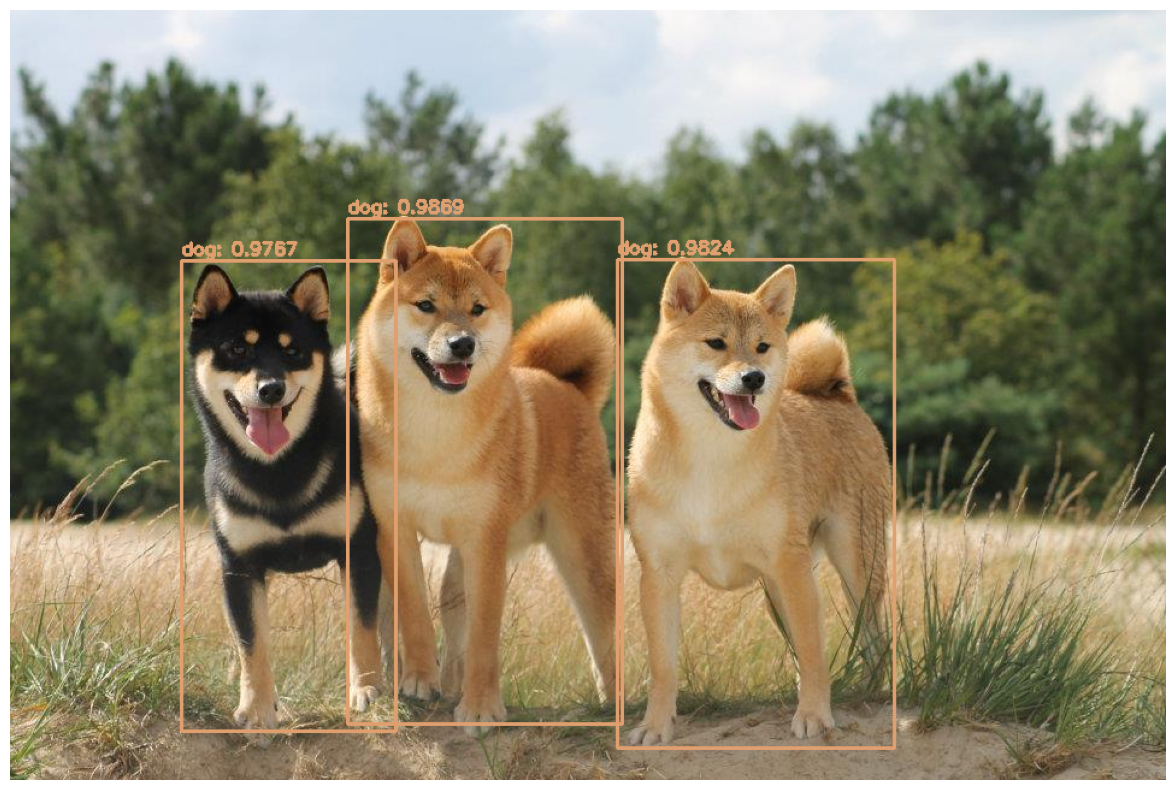

In [59]:
mostrar(imagem)

In [60]:
cv2.imwrite('resultado_cachorros_detectados.jpg', imagem)

True

In [61]:
!cp ./resultado_cachorros_detectados.jpg /content/drive/MyDrive/YOLO/